In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the Dataset
loan_dataset = pd.read_csv('loan_data.csv')

In [3]:
loan_dataset

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
loan_dataset.info() #No Null Values in Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
#Checking the count of the target variable
loan_dataset['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# EDA of the data

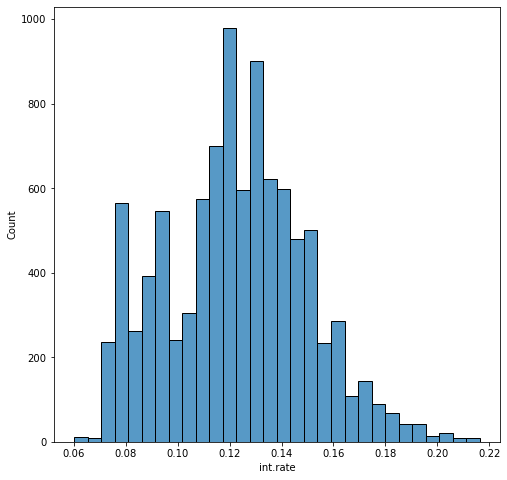

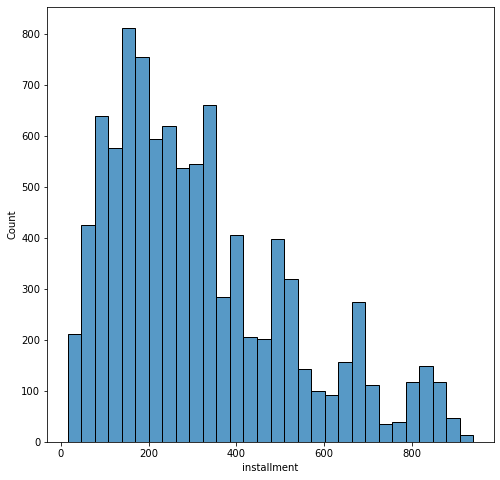

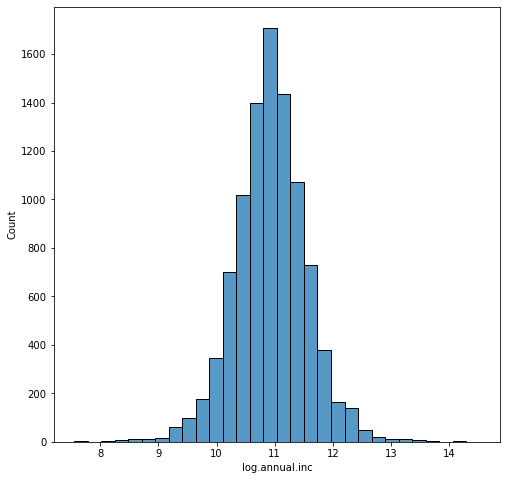

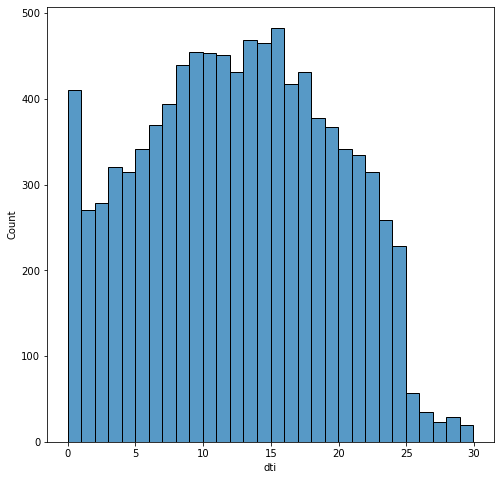

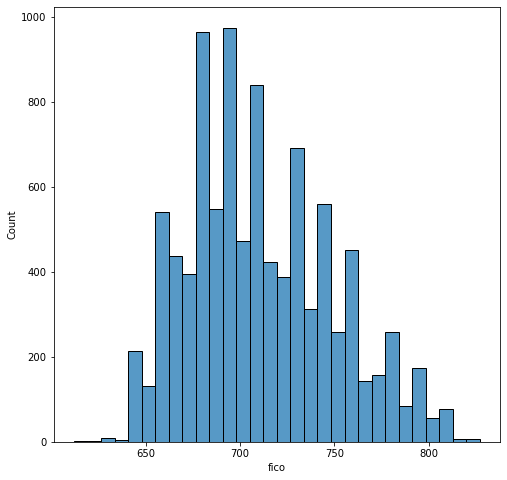

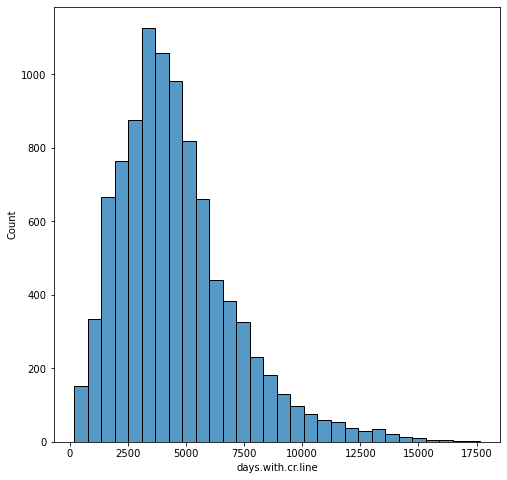

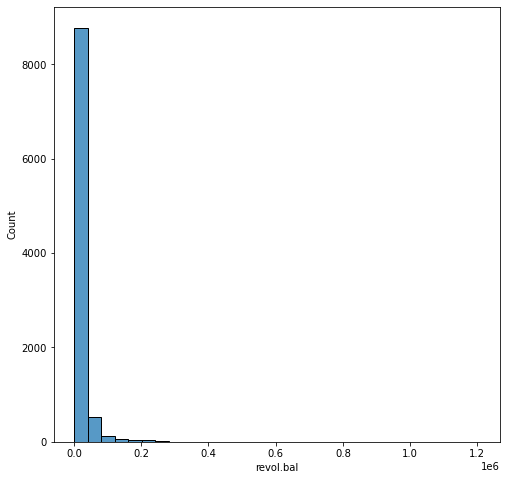

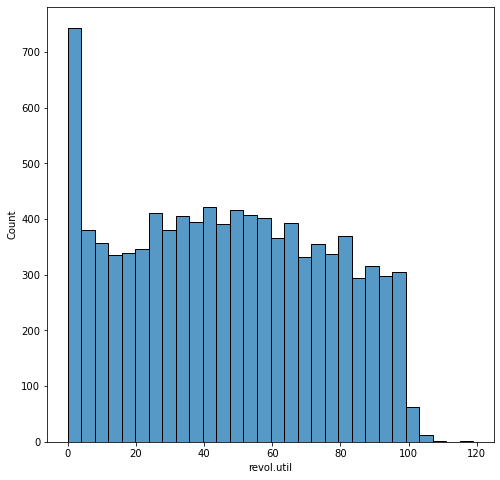

In [7]:
#distribution of interest rates
distributed_features = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']

for i in distributed_features:
    plt.figure(figsize=(8,8))
    sns.histplot(loan_dataset[i],bins=30)

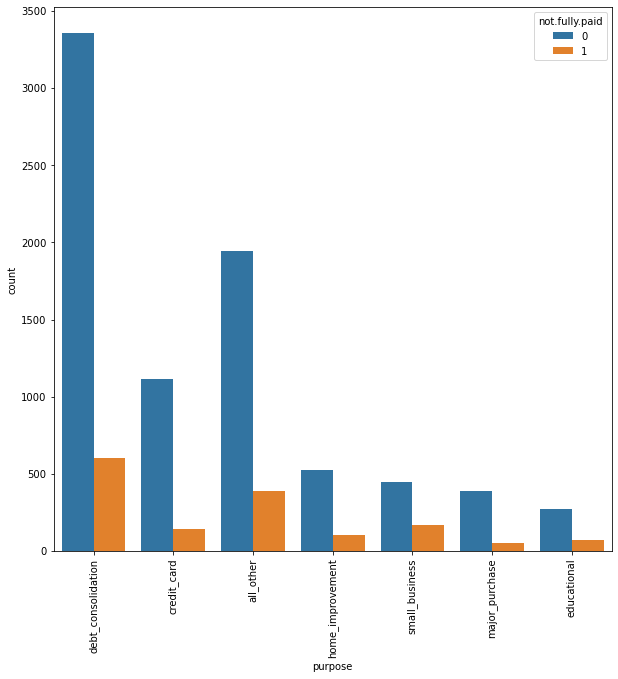

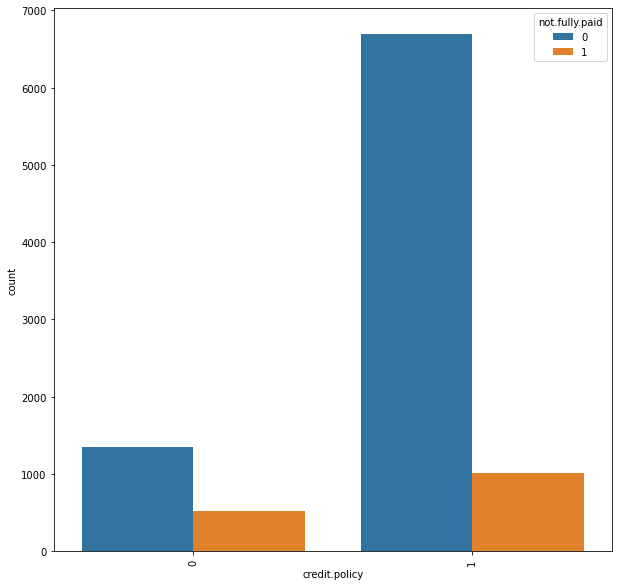

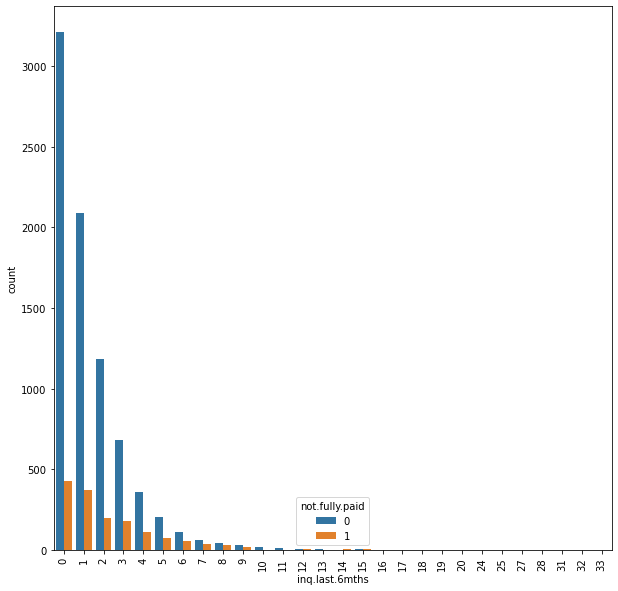

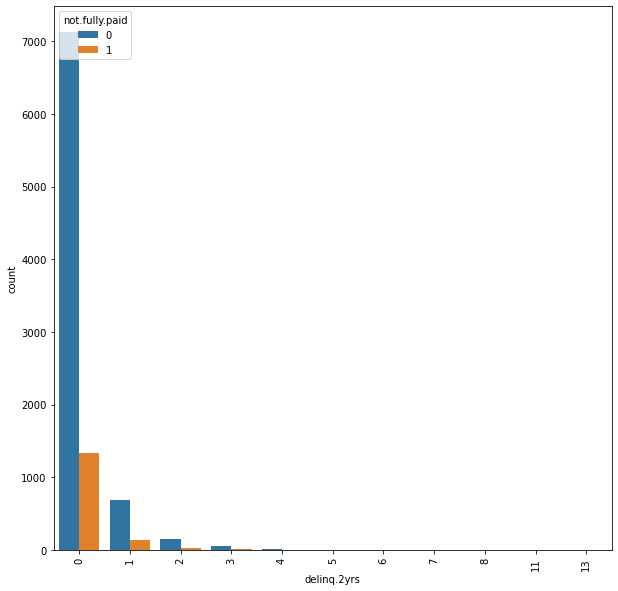

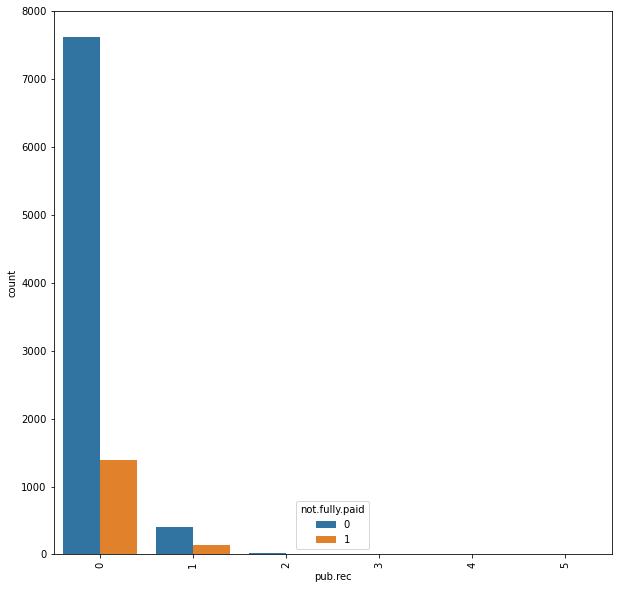

In [8]:
#distribution of discrete features
discrete_feat = ['purpose','credit.policy','inq.last.6mths','delinq.2yrs','pub.rec']

for i in discrete_feat:
    plt.figure(figsize=(10,10))
    plt.xticks(rotation=90)
    sns.countplot(i, data = loan_dataset , hue='not.fully.paid')

In [9]:
#Converting Purpose feature using one hot encoding
Purpose = loan_dataset['purpose']
Purpose_df = pd.get_dummies(Purpose)
for i in list(Purpose_df.columns):
    loan_dataset[i] = Purpose_df[i]
#loan_dataset = loan_dataset.drop(['purpose'],axis=1)

In [10]:
loan_dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

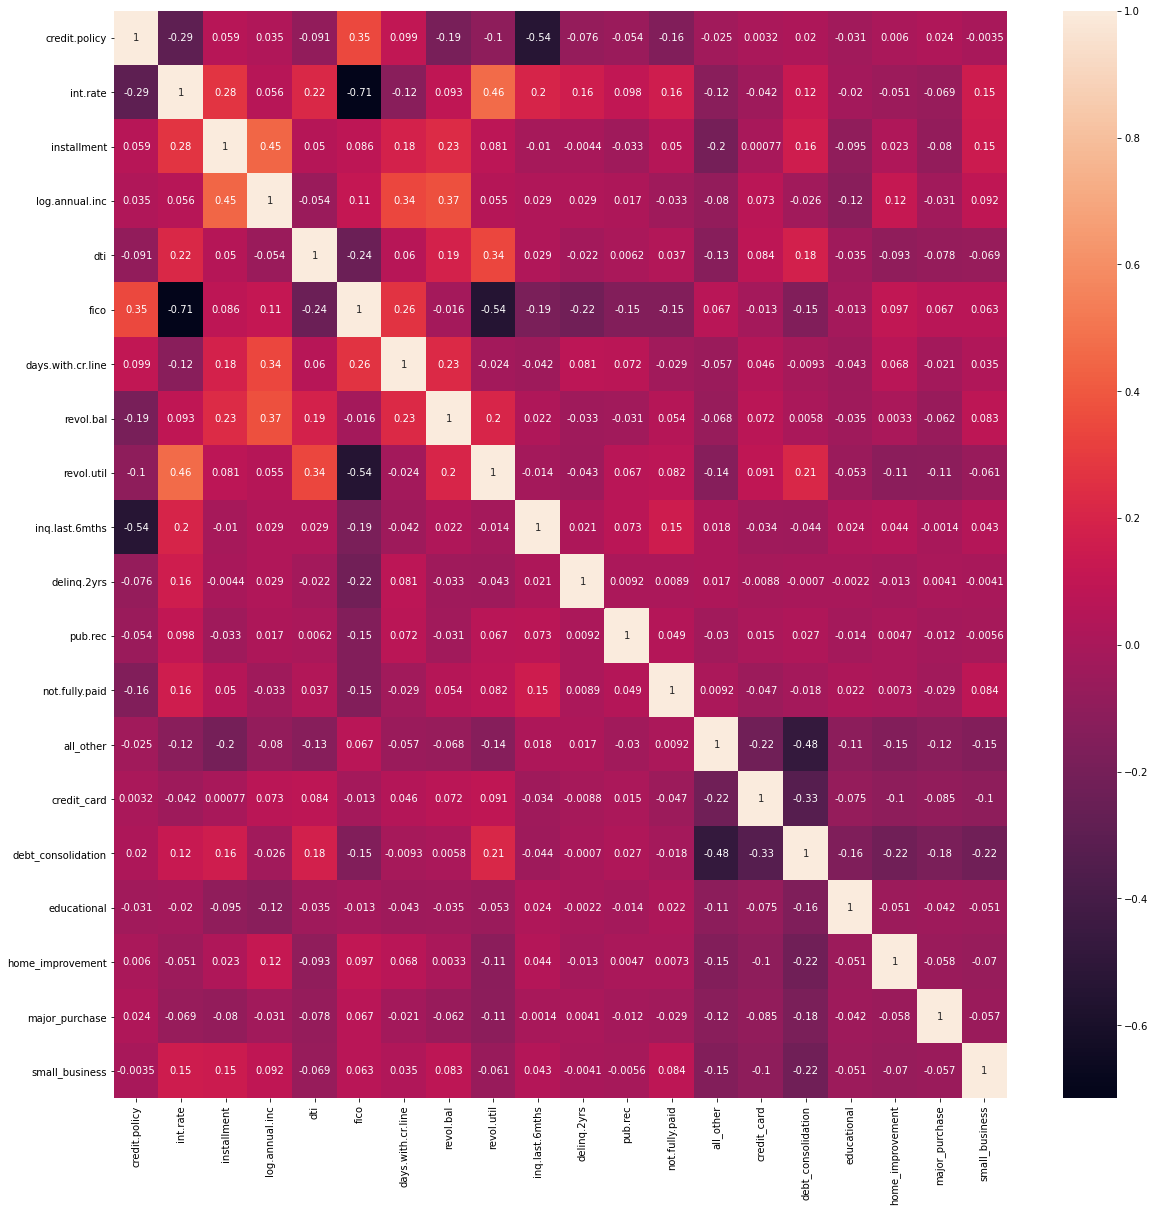

In [11]:
#calculating correlations
plt.figure(figsize=(20,20))
sns.heatmap(loan_dataset.corr(),annot=True)

In [12]:
loan_dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

X = loan_dataset.drop(['not.fully.paid','purpose'],axis=1)
y = loan_dataset['not.fully.paid']

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

randfor_1 = RandomForestClassifier()
model_1 = randfor_1.fit(X_train,y_train)

In [15]:
pred = model_1.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[3206   19]
 [ 595   12]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3225
           1       0.39      0.02      0.04       607

    accuracy                           0.84      3832
   macro avg       0.62      0.51      0.48      3832
weighted avg       0.77      0.84      0.77      3832

0.8397703549060542


About 83.97% is the accuracy. Lets see if we can improve the accuracy using Feature Selection techniques

# Feature Selection

### Feature Selection using SelectKBest

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=10) #taken best 10 features in the model
model_2 = fs.fit(X_train, y_train)

print('Score list:', model_2.scores_)
print('Feature list:', X_train.columns)

Score list: [147.49880347 129.86822083  11.08312031   7.66026284  11.92723256
 129.80602482   5.20049389   8.97101421  35.02739492 135.77518826
   0.34790292  14.91720639   0.329677     8.59288403   1.22425807
   2.42164252   1.37770459   7.79340853  27.16743455]
Feature list: Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'all_other', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')


In [18]:
#Transforming data with 10 features
X_train_2 = model_2.transform(X_train)
X_test_2 = model_2.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

randfor_2 = RandomForestClassifier()
randfor_2.fit(X_train_2,y_train)

RandomForestClassifier()

In [20]:
pred_2 = randfor_2.predict(X_test_2)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred_2))
print(classification_report(y_test,pred_2))
print(accuracy_score(y_test,pred_2))

[[3186   39]
 [ 586   21]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3225
           1       0.35      0.03      0.06       607

    accuracy                           0.84      3832
   macro avg       0.60      0.51      0.49      3832
weighted avg       0.77      0.84      0.78      3832

0.8368997912317327


We get 83.68% accuracy, when we take the best 10 features, lower than our initial model accuracy.

### Using RFE

In [22]:
from sklearn.feature_selection import RFE

randfor_3 = RandomForestClassifier()
rfe = RFE(estimator=randfor_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [23]:
print('Chosen best 10 features by rfe:',X_train.columns[rfe.support_])

Chosen best 10 features by rfe: Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'debt_consolidation'],
      dtype='object')


In [24]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [25]:
model = RandomForestClassifier()
model = model.fit(X_train_rfe,y_train)

In [26]:
model_pred = model.predict(X_test_rfe)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,model_pred))
print(classification_report(y_test,model_pred))
print(accuracy_score(y_test,model_pred))

[[3199   26]
 [ 591   16]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3225
           1       0.38      0.03      0.05       607

    accuracy                           0.84      3832
   macro avg       0.61      0.51      0.48      3832
weighted avg       0.77      0.84      0.78      3832

0.8389874739039666


Using RFE we get 83.89% as the accuracy. Having tried both SelectKbest and RFE the accuracy is still lower than our original model. This tells me taking 10 features in my model isnt optimal. Lets try using Cross_validation on RFE to find the optimal number of features to get the best accuracy.

### Using RFECV

In [28]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'all_other',
       'debt_consolidation', 'small_business'],
      dtype='object')


In [29]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [30]:
model_rfecv = RandomForestClassifier() 
model_rfecv.fit(X_train_rfecv,y_train)

RandomForestClassifier()

In [31]:
model_pred = model_rfecv.predict(X_test_rfecv)

In [32]:
print(confusion_matrix(y_test,model_pred))
print(classification_report(y_test,model_pred))
print(accuracy_score(y_test,model_pred))

[[3205   20]
 [ 592   15]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3225
           1       0.43      0.02      0.05       607

    accuracy                           0.84      3832
   macro avg       0.64      0.51      0.48      3832
weighted avg       0.78      0.84      0.78      3832

0.8402922755741128


Seems RFE with cross validation, has the best accuracy of 84.02% by taking 15 features as the optimal number of features

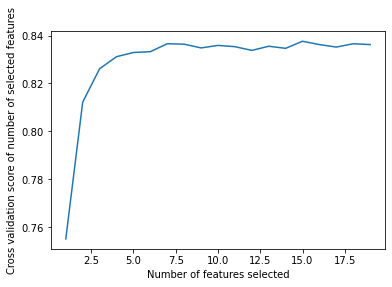

In [33]:
#Accuracy score with number of features taken in model
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

From the above Graph you can see that the accuracy is very similar above 8 features.

### Using ExtraTreeClassifier to find Feature Importances

In [34]:
from sklearn.tree import ExtraTreeClassifier

extra_Tree = ExtraTreeClassifier()
extra_Tree = extra_Tree.fit(X_train,y_train)
feat_importances = list(extra_Tree.feature_importances_)

dict_importances = {}

cols = list(X.columns)
for i in range(len(cols)):
    dict_importances[cols[i]] = feat_importances[i]

dict_importances #dictionary of feature importances 

{'credit.policy': 0.02493160277722574,
 'int.rate': 0.10050788398761913,
 'installment': 0.09875857876118728,
 'log.annual.inc': 0.10422023544821858,
 'dti': 0.0997235548641337,
 'fico': 0.09987420445959219,
 'days.with.cr.line': 0.08927641322385833,
 'revol.bal': 0.100706243235427,
 'revol.util': 0.10008781740748082,
 'inq.last.6mths': 0.08225975874372846,
 'delinq.2yrs': 0.022556859378433717,
 'pub.rec': 0.022775819022129898,
 'all_other': 0.010836888537798598,
 'credit_card': 0.007889440096914547,
 'debt_consolidation': 0.011269798773375769,
 'educational': 0.003577421710782796,
 'home_improvement': 0.0097463571403674,
 'major_purchase': 0.0013549527899594962,
 'small_business': 0.009646169641766613}

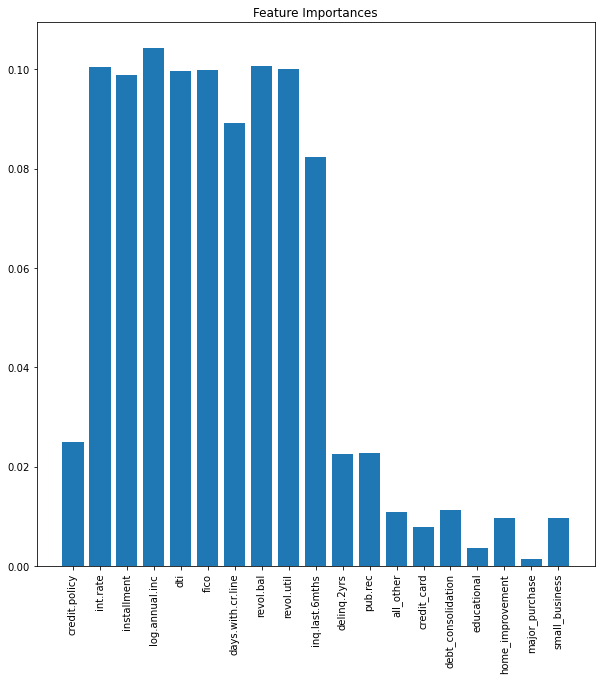

In [35]:
plt.figure(1, figsize=(10,10))
plt.title("Feature Importances")
plt.bar(dict_importances.keys(), dict_importances.values())
plt.xticks(rotation=90)
plt.show()

most important features as per the Extra Trees classifier are similar to the ones in RFE.

Lets see if Hyper parameter tuning helps improve our model. I will use the RFECV model as it has the best accuracy till now.

# RandomizedSearchCV random forest

In [36]:
from sklearn.model_selection import RandomizedSearchCV

#The number of trees in the forest.
n_estimators = [int(i) for i in np.linspace(start=100 , stop=1200 , num=12)]
#The maximum depth of the tree.
max_depth= [int(i) for i in np.linspace(start=5 , stop=30 , num=6)]
#The minimum number of samples required to split an internal node
min_samples_split = [5, 10 , 15 , 20 , 50 , 100]
#The number of features to consider when looking for the best split
max_features = ["auto", "sqrt"]
#The minimum number of samples required to be at a leaf node.
min_samples_leaf =[2, 5, 10, 20]

In [37]:
random_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
               'min_samples_split':min_samples_split,
              'max_features':max_features,
              'min_samples_leaf':min_samples_leaf}

In [38]:
final_model = RandomizedSearchCV(estimator=model_rfecv,param_distributions=random_grid,scoring='accuracy',n_iter=10, cv=5,verbose=2,random_state=42,n_jobs=1)

In [39]:
final_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   7.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   7.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   8.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   8.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   8.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=20, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=20, max_features=auto, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=100, 

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   7.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   6.5s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   6.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   6.1s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   6.5s
[CV] n_estimators=300, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 20],
                                        'min_samples_split': [5, 10, 15, 20, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [40]:
#best paramters values
final_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 100,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 10}

In [41]:
# predicting position from test data
y_pred = final_model.predict(X_test)

In [42]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[3225    0]
 [ 607    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3225
           1       0.00      0.00      0.00       607

    accuracy                           0.84      3832
   macro avg       0.42      0.50      0.46      3832
weighted avg       0.71      0.84      0.77      3832

0.8415970772442589


After hyper parameter tuning , you can see the accuracy has increased slightly to 84.15% and hence this is the final model

## Conclusion

1. Features like 'int.rate', 'installment', 'log.annual.income', 'dti' , 'fico' , 'days.with.cr.line' , 'revol.bal' , 'revol.util' , 'inq.last.6mnths' have most significance with our target variable.

2. Any Model trained with the 8 most significant features or above have very similar accuracy. ( RFECV graph)